<a href="https://colab.research.google.com/github/Chocoding1/Machine_Learning_Deep_Learning/blob/main/04_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **로지스틱 회귀**

## 럭키백의 확률<br>
- 럭키백에 들어갈 수 있는 생선은 7마리<br>
- 럭키백에 들어간 생선의 크기, 무게 등이 주어졌을 대 7마리 생선에 대한 확률을 출력해야 한다.(길이, 높이, 두께 외에도 대각선 길이와 무게도 사용 가능)<br>

아이디어 1) k-최근접 이웃은 주변 이웃을 찾아주니까 이웃의 클래스 비율을 확률이라고 출력하면 되지 않을까

### 데이터 준비

In [1]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head() # 처음 5개 행 출력

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [2]:
# 어떤 종류의 생선이 있는지 확인
print(pd.unique(fish['Species'])) # pandas의 unique() 함수를 사용하여 Species 열에서 고유한 값 추출

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [3]:
# Species 열을 타깃으로 만들고, 나머지 5개 열은 입력 데이터로 사용
# 데이터프레임에서 열 선택하기 : 원하는 열을 리스트로 나열
# Species 열을 빼고 나머지 5개 열 선택
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy() # 데이터프레임에서 여러 열을 선택하면 새로운 데이터프레임 반환 -> 넘파이 배열로 변환하여 저장

In [4]:
# 5개의 특성 잘 저장되었는지 확인
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [5]:
 # 타깃 데이터 생성
 fish_target = fish['Species'].to_numpy()

In [6]:
# 데이터를 훈련 세트와 테스트 세트로 분리
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [7]:
# 사이킷런의 StandardScaler 클래스를 사용해 훈련 세트와 테스트 세트를 표준화 전처리
# 반드시 훈련 세트의 통계 값으로 테스트 세트를 변환해야 한다.
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

### k-최근접 이웃 분류기의 확률 예측

In [8]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


앞서 타깃 데이터를 만들 때 fish['Species']를 사용해 만들었기 때문에 훈련 세트와 테스트 세트의 타깃 데이터에도 7개의 생선 종류가 들어있다.<br>
이렇게 타깃 데이터의 2개 이상의 클래스가 포함된 문제를 **다중 분류(multi-class classification)**라고 한다.

In [9]:
# 타깃값을 그대로 사이킷런 모델에 전달하면 순서가 자동으로 알파벳 순으로 매겨진다.(pd.unique(fish['Species'])로 출력했던 순서와 다르다.)
# KNeighborsClassifier에서 정렬된 타깃값은 classes_ 속성에 저장
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
# predict() 메서드는 친절하게 타깃값으로 예측을 출력한다.
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


위 5개 샘플에 대한 예측은 어떤 확률로 만들어졌을까?<br>
사이킷런의 분류 모델은 predict_proba() 메서드로 클래스별 확률값을 반환한다.

In [10]:
# 테스트 세트에 있는 처음 5개의 샘플에 대한 확률 출력
# 넘파이 round() 함수는 기본으로 소수점 첫째 자리에서 반올림하는데, decimals 매개변수로 유지할 소수점 아래 자릿수 지정 가능
import numpy as np

proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4)) # 구한 확률들을 소수점 네 번째 자리까지 표기
# predict_proba() 메서드의 출력 순서는 앞서 보았던 classes_ 속성과 동일

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [ ]:
# 위 모델이 계산한 확률이 가장 가까운 이웃의 비율이 맞는지 확인
# 위 5개의 샘플 중 네 번재 샘플의 최근접 이웃의 클래스 확인
distances, indexes = kn.kneighbors(test_scaled[3:4]) # kneighbors() 메서드의 입력은 2차원 배열이어야 한다. -> 넘파이 배열의 슬라이싱 연산자 사용(슬라이싱 연산자는 하나의 샘플만 선택해도 항상 2차원 배열이 만들어짐)
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


## 로지스틱 회귀<br>
- 이름은 회귀이지만 분류 모델<br>
- 선형 회귀와 동일하게 선형 방정식 학습<br>
ex) z = a x (Weight) + b x (Length) + c x (Diagonal) + d x (Height) + e x (Width) + f<br>
- z는 확률이 되어야 하기 때문에 0~1 사이 값이 되어야 한다.<br>
- 이를 위해 **시그모이드 함수**(or **로지스틱 함수**)를 사용하면 된다.

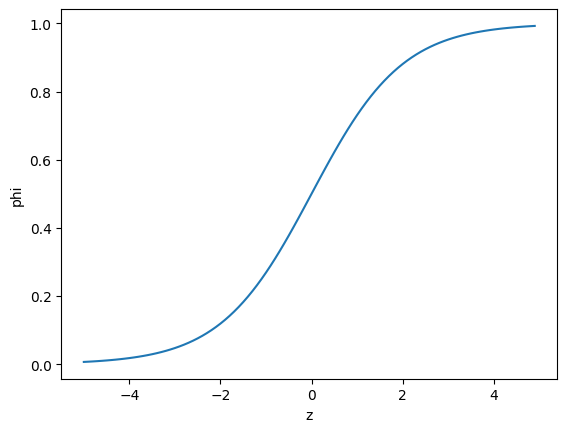

In [11]:
# 시그모이드 함수 그리기
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z)) # 시그모이드 함수식
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

사이킷런에서는 로지스틱 회귀 모델인 LogisticRegression 클래스 지원<br>

훈련 전, 간단한 이진 분류를 수행한다.<br>
이진 분류일 경우 시그모이드 함수의 출력이 0.5보다 크면 양성 클래스(1), 0.5보다 작으면 음성 클래스(0)로 판단(사이킷런의 경우 0.5일 때는 음성 클래스로 판단)

### 로지스틱 회귀로 이진 분류 수행하기

In [12]:
# 불리언 인덱싱을 사용해 훈련 세트에 도미와 빙어의 행만 골라내기
# 불리언 인덱싱 : 넘파이 배열에 True와 False값을 전달하여 True인 인덱스의 값만 뽑아서 추출하는 것
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
print(bream_smelt_indexes)
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

[ True False  True False False False False  True False False False  True
 False False False  True  True False False  True False  True False False
 False  True False False  True False False False False  True False False
  True  True False False False False False  True False False False False
 False  True False  True False False  True False False False  True False
 False False False False False  True False  True False False False False
 False False False False False  True False  True False False  True  True
 False False False  True False False False False False  True False False
 False  True False  True False False  True  True False False False False
 False False False False  True  True False False  True False False]


In [13]:
# 로지스틱 회귀 모델 훈련
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [14]:
# 훈련된 모델을 사용해 train_bream_smelt에 있는 처음 5개 샘플 예측
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [15]:
# train_bream_smelt의 처음 5개 샘플의 예측 확률 출력
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [16]:
print(lr.classes_) # 첫 번째 열이 음성 클래스(0)에 대한 확률, 두 번째 열이 양성 클래스(1)에 대한 확률
# 사이킷런은 타깃값을 알파벳순으로 정렬하여 사용

['Bream' 'Smelt']


In [17]:
# 로지스틱 회귀가 학습한 계수 확인
print(lr.coef_, lr.intercept_)
print(lr.coef_.shape, lr.intercept_.shape)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]
(1, 5) (1,)


-> 위 출력을 통해 로지스틱 회귀 모델이 학습한 방정식은 다음과 같다.<br>
z = a x (Weight) + b x (Length) + c x (Diagonal) + d x (Height) + e x (Eidth) + f<br>
-> z = -0.404 x (Weight) - 0.576 x (Length) - 0.663 x (Diagonal) - 1.013 x (Height) - 0.732 x (Width) - 2.161

LogisticRegression 모델로 z값 계산 가능<br>
-> decision_function() 메서드로 z값 출력 가능

In [18]:
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


-> 위 값을 시그모이드 함수에 통과시키면 확률을 얻을 수 있다.<br>
파이썬의 사이파이(scipy) 라이브러리에 시그모이드 함수가 있다.(expit())

In [19]:
from scipy.special import expit

print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


-> predict_proba() 메서드 출력의 두 번째 열의 값과 동일<br>
-> decision_function() 메서드는 양성 클래스에 대한 z값 반환한다는 것을 알 수 있다.

### 로지스틱 회귀로 다중 분류 수행하기

<알아둘 점><br>
- LogisticRegression 클래스는 기본적으로 반복적인 알고리즘 사용<br>
- max_iter 매개변수에서 반복 횟수를 지정하며 기본값은 100<br>
- LogisticRegression은 기본적으로 릿지 회귀와 같이 계수의 제곱을 규제<br>
- 릿지 회귀에서 alpha 변수로 규제의 양을 조절한 것과 같이 LogisticRegression에서는 C 변수로 규제를 제어(C의 기본값 1)<br>
- 하지만 C는 alpha와 반대로 작을수록 규제가 커진다.

In [20]:
# LogisticRegression 클래스로 다중 분류 모델 훈련
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [21]:
# 테스트 세트의 처음 5개 샘플에 대한 예측 출력
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [22]:
# 테스트 세트의 처음 5개 샘플에 대한 예측 확률 출력
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [23]:
# 클래스 정보 확인
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [24]:
# 계수 출력
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


In [25]:
print(lr.coef_, lr.intercept_)

[[-1.49001259 -1.02909653  2.59342992  7.70358183 -1.20070797]
 [ 0.19618191 -2.01072007 -3.77974344  6.50492519 -1.99481478]
 [ 3.562807    6.34355461 -8.48969786 -5.75757213  3.79306162]
 [-0.10458363  3.60320663  3.93067948 -3.61740078 -1.7506979 ]
 [-1.40060998 -6.0750259   5.25969918 -0.87219289  1.86043812]
 [-1.38528461  1.49213609  1.39225441 -5.67734711 -4.40097409]
 [ 0.6215019  -2.32405484 -0.9066217   1.71600589  3.69369499]] [-0.09204689 -0.26289902  3.25100925 -0.14740759  2.65498221 -6.78787045
  1.38423249]


-> 5개의 특성을 사용하므로 5개의 열<br>
-> 다중 분류는 클래스마다 z값을 하나씩 계산한다는 것을 알 수 있다.<br>
-> 왜 7개의 행인가<br>
-> 이진 분류에서 보았던 z를 7개나 계산한다는 의미 (다중 분류는 클래스마다 z값을 하나씩 계산)<br>
-> 왜 클래스 별로 계산해?<br>
-> 한 세트의 가중치와 편향으로 모든 클래스의 확률값이 최적화될 수 없다.(한 클래스의 오차가 낮으면, 나머지 클래스의 오차는 커지는게 당연) 따라서 각 클래스마다 최적의 가중치와 편향은 다르다.

-> 위의 이진 분류 로지스틱 회귀 모델은 왜 1개의 행이 나왔는가<br>
-> 로지스틱 회귀는 이진 분류에서는 하나의 선형 방정식을 훈련한다.(위의 모델의 계수가 2행이 아닌 1행이었던 이유)<br>
-> 이 방정식의 출력값을 시그모이드 함수에 통과시켜 0~1 사이의 값을 만들고, 이 값이 양성 클래스에 대한 확률<br>
-> 다중 분류일 경우에는 클래스 개수만큼 방정식을 훈련, 각 방정식의 출력값을 소프트맥스 함수를 통과시켜 전체 클래스에 대한 합이 항상 1이 되도록 한다.


확률 계산은 어떻게 하느냐?<br>
이진 분류에서는 **시그모이드** 함수를 사용해 z를 0과 1 사이의 값으로 변환하지만, 다중 분류에서는 **소프트맥스** 함수를 사용해 7개의 z값을 확률로 변환한다.

In [26]:
# 이진 분류에서처럼 decision_function() 메서드로 z1~z7까지의 값을 구한 다음 소프트맥스 함수를 사용해 확률로 변환
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [27]:
# 사이파이는 소프트맥스 함수도 제공
from scipy.special import softmax

proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3)) # 위의 predict_proba의 결과와 동일

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
